# Visually inspect lots 

In [6]:
from skimage.transform import resize as sk_resize
# Import Libaries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')
from matplotlib import colors
from matplotlib import gridspec
from matplotlib.ticker import StrMethodFormatter
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Data was generated with pandas 1.1.3 & uses pickle protocol 5 as default
df1 = pd.read_pickle('WM-clean.pkl')

In [12]:
df1

,waferMap,dieSize,lotName,waferIndex,failureType,encoding,x_,y_,shape,labels,dataset
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",test
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,none,1,45,48,"(45, 48)","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
...,...,...,...,...,...,...,...,...,...,...,...
172945,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Edge-Loc,3,26,30,"(26, 30)","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
172946,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Edge-Loc,3,26,30,"(26, 30)","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
172947,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Edge-Ring,2,26,30,"(26, 30)","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",train
172948,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Edge-Loc,3,26,30,"(26, 30)","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",dev


In [20]:
# Dictionary of XKCD color map
cm_xkcd = colors.XKCD_COLORS.copy()

# Generate a pd.Series of lots w/ 25 wafers in DF1
full_lots_df1 = (df1.groupby('lotName').count().waferMap == 25).index[df1.groupby('lotName').count().waferMap == 25].to_series()

def plot_lot(lot, img_dims=[30, 30], fig_size=(10, 10), resize=False):
    """
    Helper function to plot entire lot of wafers from df1
    
    :param lot: -> str | lotName that will be plotted e.g. 'lot1'
    :param img_dims: -> tuple (x,y) to adjust the overall figure size
    :param fig_size: -> list [x,y] pixles to resize the image to
    :param resize: -> bool | Resize the image to `img_dims` if True 
    """
    lot_df = df1[df1['lotName'] == lot]
    lot_df.reset_index(drop=True, inplace=True)

    total_rows = len(lot_df.index)
    ax_cnt = 5

    fig, axs = plt.subplots(ax_cnt, ax_cnt, figsize=fig_size)
    # make a color map of fixed colors - blue passing die, fuchsia failing die
    cmap = colors.ListedColormap(
        [cm_xkcd['xkcd:white'], cm_xkcd['xkcd:azure'], cm_xkcd['xkcd:fuchsia']])

    # Nested for loops to loop through all digits and number of examples input for ploting
    for n_row in range(total_rows):
        img = lot_df.waferMap[n_row]
        if resize:
            img = sk_resize(img*1024, img_dims, anti_aliasing=True)

        # imshow to plot image in axs i,j loaction in plot
        i = n_row % ax_cnt
        j = int(n_row/ax_cnt)
        axs[i, j].imshow(img,
                         interpolation='none',
                         cmap=cmap)
        axs[i, j].axis('off')
        
        # label the figure with the lot# and defect classification [for future reference]
        if i == 0 and j == 2:
            axs[i, j].set_title(f'{lot}\n{lot_df.failureType[n_row]}')
        else:
            axs[i, j].set_title(f'{lot_df.failureType[n_row]}', fontsize=9)

    plt.show()


def plot_n(n=5, img_dims=[30, 30], fig_size=(10, 10)):
    """
    Helper function to plot n random full lots 
    (lot contains all 25 wafers) from df1
    
    :param n: number of lots to plot
    :param img_dims: -> tuple (x,y) to adjust the overall figure size
    :param fig_size: -> list [x,y] pixles to resize the image to
    :returns: -> dict {i: lotname} of the lots that were plotted
    """
    lots_used = {}
    for _, lot in enumerate(full_lots_df1.sample(n).tolist()):
        lots_used[_] = lot
        print(f'[{_}] - {lot}')
        plot_lot(lot, resize=True, fig_size=fig_size)
    
    return lots_used

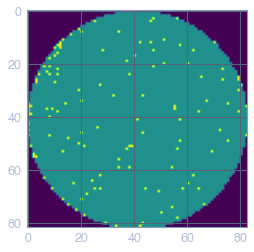

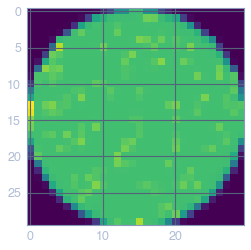

In [7]:
# example
d12 = df1[df1['lotName'] == 'lot15471'].iloc[0].waferMap
d123 = sk_resize(d12*1024,[30,30], anti_aliasing=True)
plt.imshow(d12);
plt.show()
plt.imshow(d123);
plt.show()

[0] - lot44144


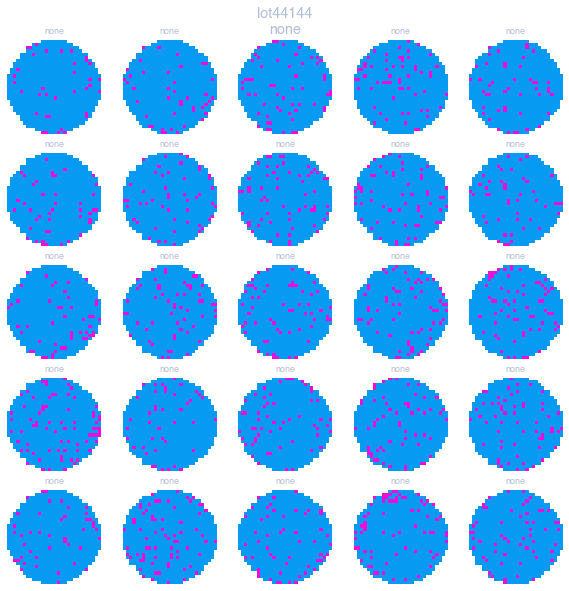

[1] - lot44116


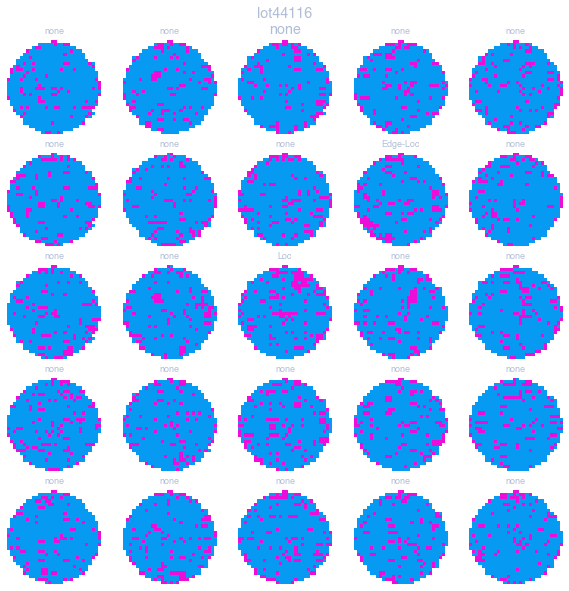

[2] - lot45161


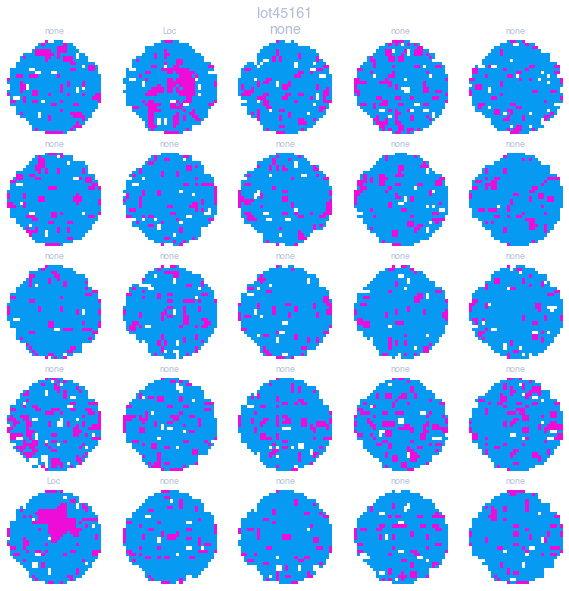

[3] - lot42618


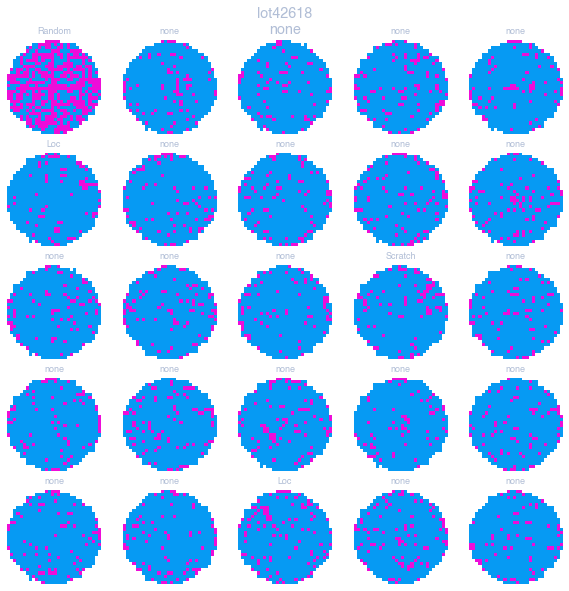

[4] - lot45759


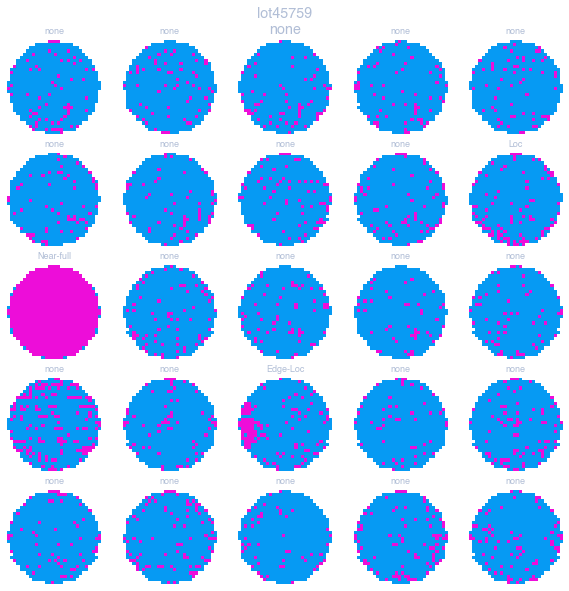

In [21]:
# display images w/ compression to 30x30
lots_used = plot_n()

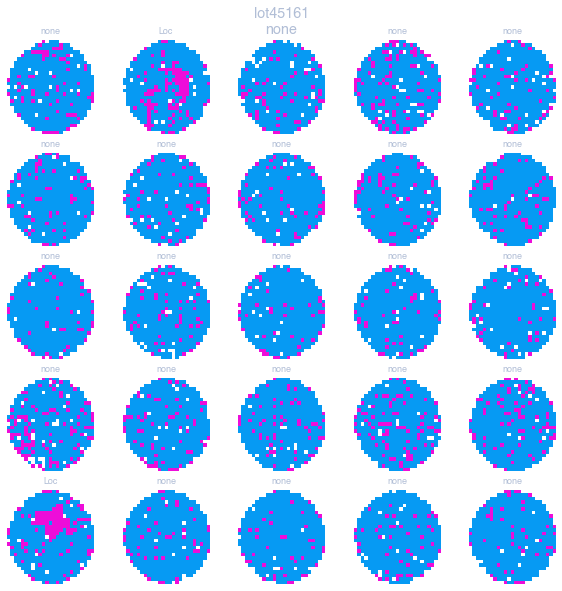

In [25]:
plot_lot(lots_used[2])

[0] : lot44144


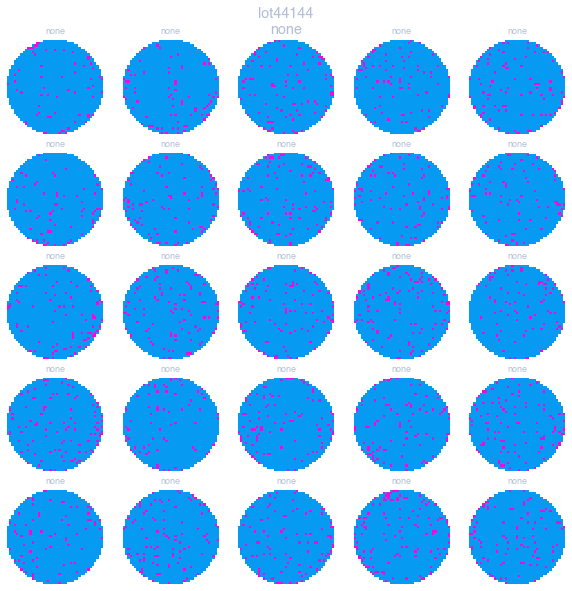

[1] : lot44116


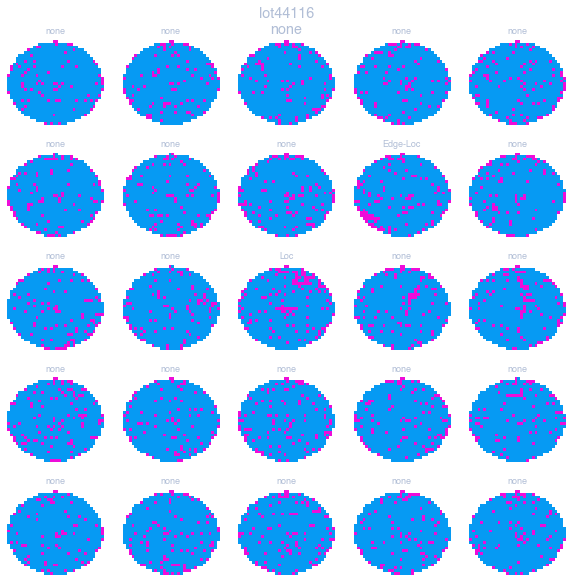

[2] : lot45161


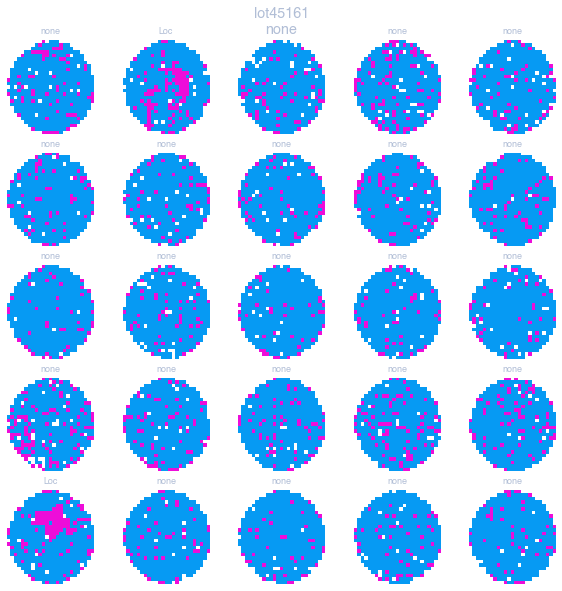

[3] : lot42618


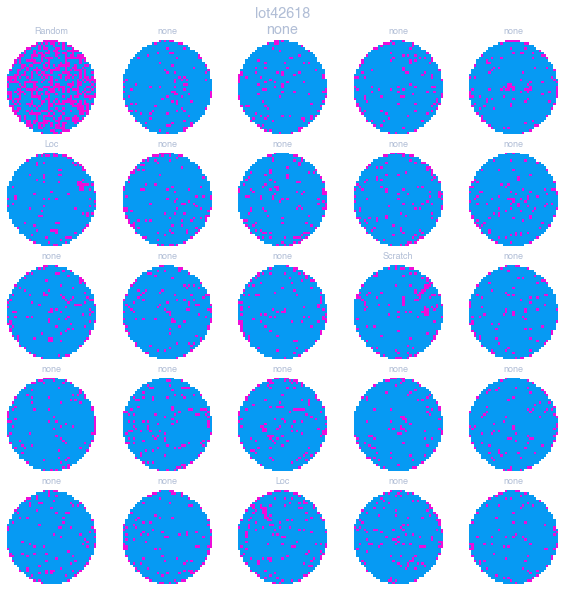

[4] : lot45759


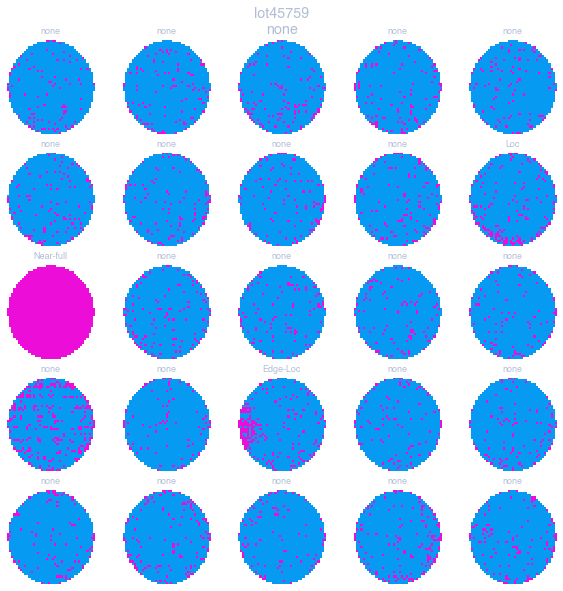

In [26]:
# display images w/o compression to 30x30
for i, lot in lots_used.items():
    print(f"[{i}] : {lot}")
    plot_lot(lot)
    plt.show()

[30x30]


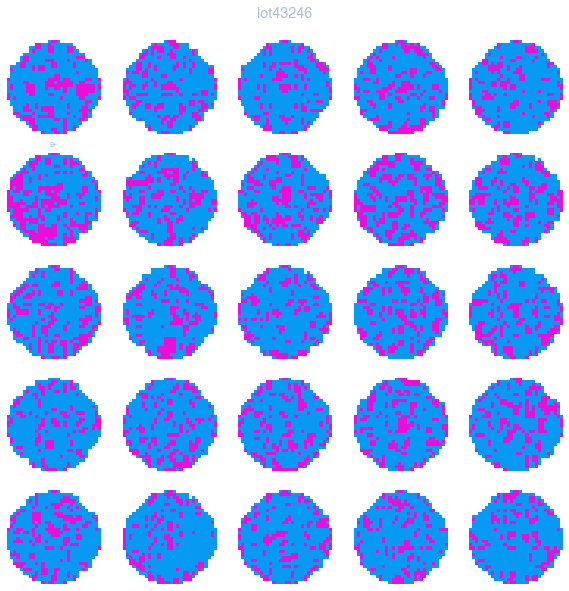

(25, 27)


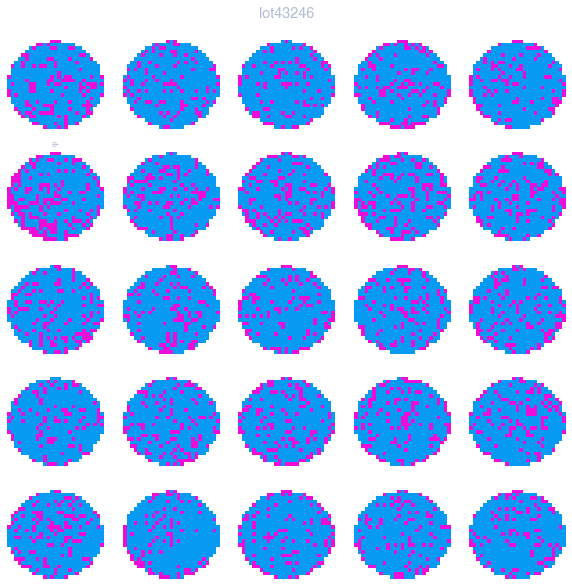

[60x60]


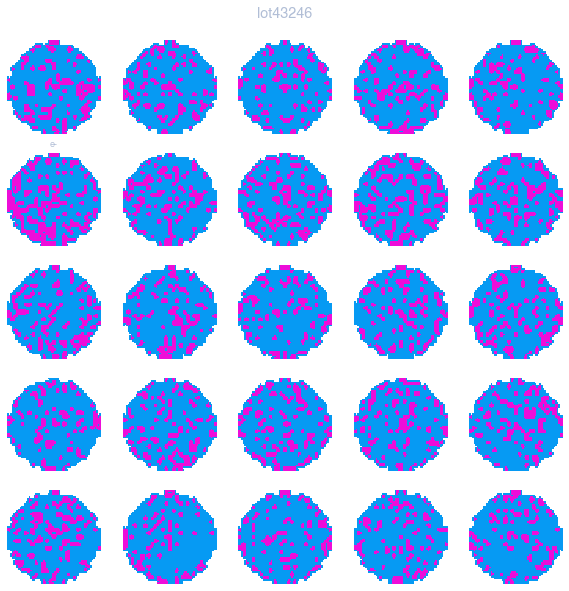

In [11]:
lot = 'lot43246'
print('[30x30]')
plot_lot(lot, resize=True, img_dims=[30,30], fig_size=[10,10])
print(f"{df1[df1.lotName == lot]['shape'].iloc[0]}")
plot_lot(lot, fig_size=[10,10])
print('[60x60]')
plot_lot(lot, resize=True, img_dims=[60,60], fig_size=[10,10])